## Libraries

In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

## Data - La Nina events

In [2]:
from google.colab import files
uploaded = files.upload()

Saving lanina.csv to lanina.csv


In [11]:
file = 'lanina.csv'

X = pd.read_csv(file,header=None,index_col=0)
X

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,,,,,,,,,,,,,,,,,,
1954-1955,0.8,0.8,0.8,0.8,0.5,0.0,-0.4,-0.5,-0.5,-0.6,-0.8,-0.9,-0.8,-0.7,-0.7,-0.7,-0.6,-0.7
1955-1956,-0.7,-0.7,-0.6,-0.7,-0.8,-0.8,-0.7,-0.7,-0.7,-1.1,-1.4,-1.7,-1.5,-1.1,-0.8,-0.6,-0.5,-0.5
1964-1965,1.3,1.4,1.3,1.1,0.6,0.1,-0.3,-0.6,-0.6,-0.6,-0.7,-0.8,-0.8,-0.8,-0.8,-0.6,-0.3,-0.1
1970-1971,0.3,0.3,0.2,0.0,-0.3,-0.6,-0.8,-0.8,-0.7,-0.9,-1.1,-1.4,-1.4,-1.1,-0.8,-0.7,-0.7,-0.8
1971-1972,-0.9,-1.1,-1.4,-1.4,-1.1,-0.8,-0.7,-0.7,-0.8,-0.8,-0.8,-0.9,-1.0,-0.9,-0.7,-0.4,0.1,0.4
1973-1974,2.1,1.8,1.2,0.5,-0.1,-0.5,-0.9,-1.1,-1.3,-1.5,-1.7,-1.9,-2.0,-1.8,-1.6,-1.2,-1.0,-0.9
1974-1975,-2.0,-1.8,-1.6,-1.2,-1.0,-0.9,-0.8,-0.5,-0.4,-0.4,-0.6,-0.8,-0.6,-0.5,-0.6,-0.7,-0.7,-0.8
1975-1976,-0.5,-0.6,-0.7,-0.7,-0.8,-1.0,-1.1,-1.2,-1.4,-1.4,-1.6,-1.7,-1.6,-1.2,-0.7,-0.5,-0.3,0.0
1983-1984,2.2,1.9,1.5,1.3,1.1,0.7,0.3,-0.1,-0.5,-0.8,-1.0,-0.9,-0.6,-0.4,-0.3,-0.4,-0.5,-0.4


In [12]:
df = X.T

## Unsupervised Clustering Models

### KMeans

In [29]:
silhouette_coefficients = []

for k in range (2,11):
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(X)
  # print(kmeans.inertia_)
  score = silhouette_score(X, kmeans.labels_)
  silhouette_coefficients.append(score)

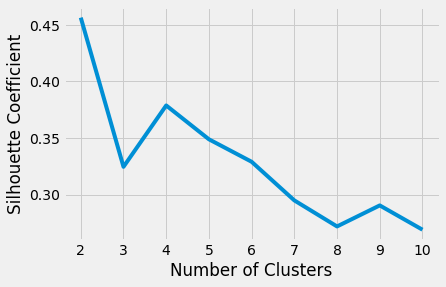

In [30]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [46]:
kmeans = KMeans(n_clusters=7, random_state=42)

kmeans_pred = kmeans.fit_predict(X)
kmeans_clusters = np.unique(kmeans_pred)

for cluster in kmeans_clusters:
  row_ix = np.where(kmeans_pred==cluster)
  print(row_ix)
  print(cluster, X.iloc[row_ix])
  # plt.scatter(row_ix,X.iloc[row_ix])
# plt.grid()
# plt.show()

(array([ 4, 14, 17]),)
0             1    2    3    4    5    6    7    8    9    10   11   12   13  \
0                                                                            
1971-1972 -0.9 -1.1 -1.4 -1.4 -1.1 -0.8 -0.7 -0.7 -0.8 -0.8 -0.8 -0.9 -1.0   
2000-2001 -1.7 -1.7 -1.4 -1.1 -0.8 -0.7 -0.6 -0.6 -0.5 -0.5 -0.6 -0.7 -0.7   
2008-2009 -1.4 -1.2 -0.9 -0.8 -0.5 -0.4 -0.3 -0.3 -0.4 -0.6 -0.7 -0.8 -0.7   

            14   15   16   17   18  
0                                   
1971-1972 -0.9 -0.7 -0.4  0.1  0.4  
2000-2001 -0.7 -0.5 -0.4 -0.3 -0.3  
2008-2009 -0.5 -0.2  0.1  0.4  0.5  
(array([ 5, 12, 18]),)
1             1    2    3    4    5    6    7    8    9    10   11   12   13  \
0                                                                            
1973-1974  2.1  1.8  1.2  0.5 -0.1 -0.5 -0.9 -1.1 -1.3 -1.5 -1.7 -1.9 -2.0   
1998-1999  2.2  1.9  1.4  1.0  0.5 -0.1 -0.8 -1.1 -1.3 -1.4 -1.5 -1.6 -1.5   
2010-2011  1.3  1.6  1.5  1.3  0.9  0.4 -0.1 -0.6 -1.0 -1.4 -1

In [32]:
year=[0.0833, 0.1667, 0.25, 0.3333, 0.4167, 0.5, 0.5833, 0.6667, 0.75, 0.8333, 0.9167, 1, 1.0833, 1.1667, 1.25, 1.3333, 1.4167, 1.5]

len(year)

18

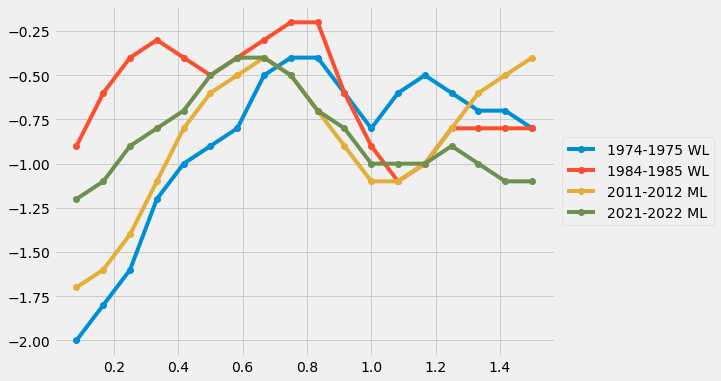

In [52]:
plt.figure(figsize=(8,6))
plt.plot(year,df['1974-1975'], 'o-', label='1974-1975 WL')
plt.plot(year,df['1984-1985'], 'o-', label='1984-1985 WL')
plt.plot(year,df['2011-2012'], 'o-', label='2011-2012 ML')
plt.plot(year,df['2021-2022'], 'o-', label='2021-2022 ML')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show();

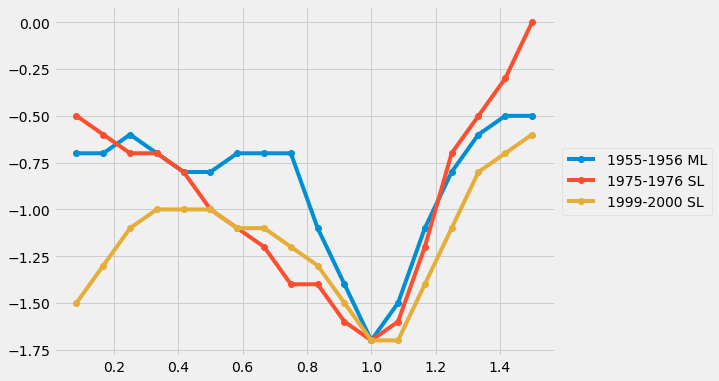

In [51]:
plt.figure(figsize=(8,6))
plt.plot(year,df['1955-1956'], 'o-', label='1955-1956 ML')
plt.plot(year,df['1975-1976'], 'o-', label='1975-1976 SL')
plt.plot(year,df['1999-2000'], 'o-', label='1999-2000 SL')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show();

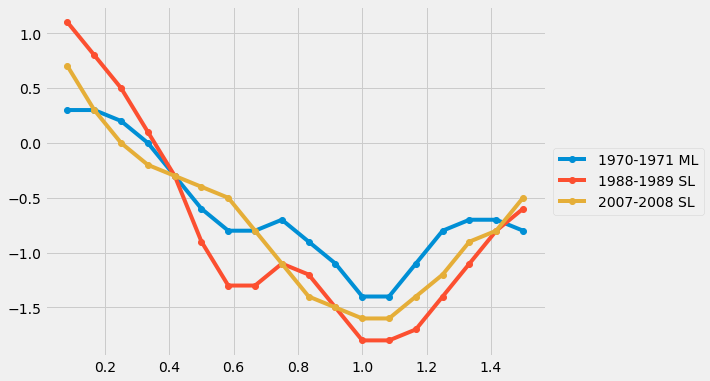

In [50]:
plt.figure(figsize=(8,6))
plt.plot(year,df['1970-1971'], 'o-', label='1970-1971 ML')
plt.plot(year,df['1988-1989'], 'o-', label='1988-1989 SL')
plt.plot(year,df['2007-2008'], 'o-', label='2007-2008 SL')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show();

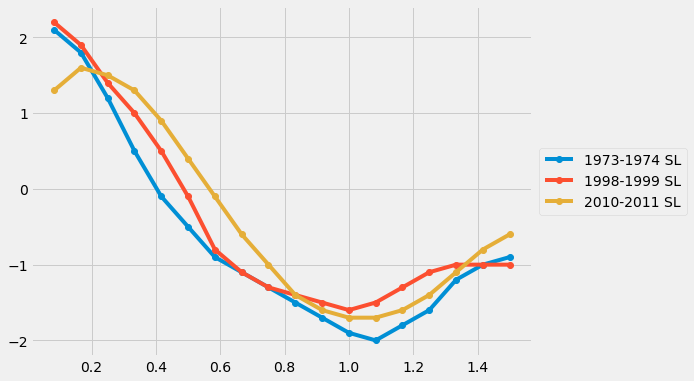

In [49]:
plt.figure(figsize=(8,6))
plt.plot(year,df['1973-1974'], 'o-', label='1973-1974 SL')
plt.plot(year,df['1998-1999'], 'o-', label='1998-1999 SL')
plt.plot(year,df['2010-2011'], 'o-', label='2010-2011 SL')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show();

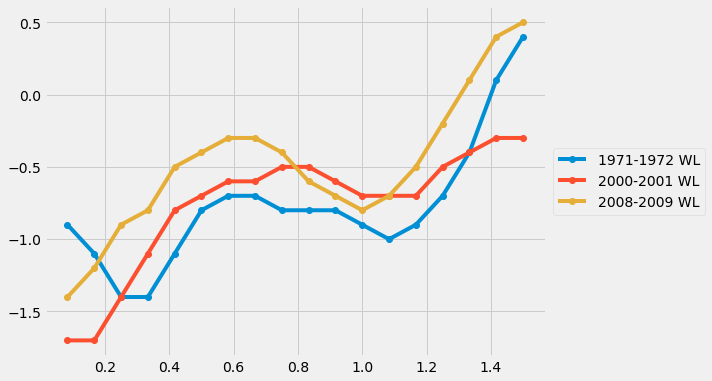

In [48]:
plt.figure(figsize=(8,6))
plt.plot(year,df['1971-1972'], 'o-', label='1971-1972 WL')
plt.plot(year,df['2000-2001'], 'o-', label='2000-2001 WL')
plt.plot(year,df['2008-2009'], 'o-', label='2008-2009 WL')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show();

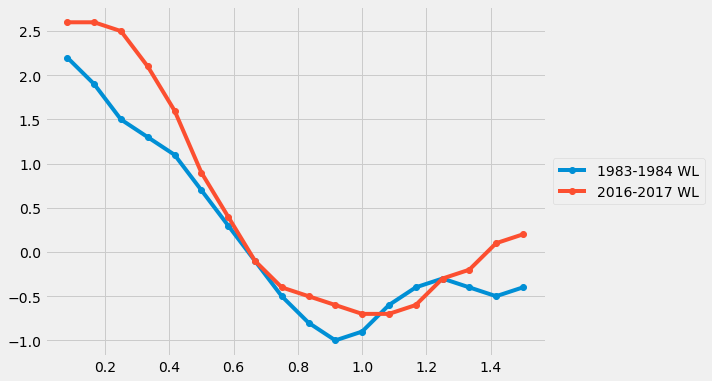

In [37]:
plt.figure(figsize=(8,6))
plt.plot(year,df['1983-1984'], 'o-', label='1983-1984 WL')
plt.plot(year,df['2016-2017'], 'o-', label='2016-2017 WL')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show();

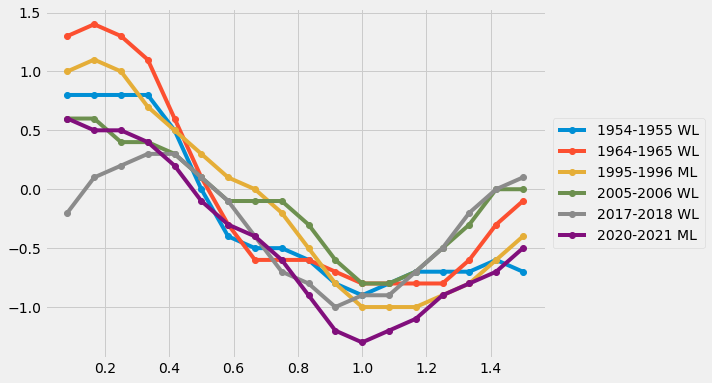

In [53]:
plt.figure(figsize=(8,6))
plt.plot(year,df['1954-1955'], 'o-', label='1954-1955 WL')
plt.plot(year,df['1964-1965'], 'o-', label='1964-1965 WL')
plt.plot(year,df['1995-1996'], 'o-', label='1995-1996 ML')
plt.plot(year,df['2005-2006'], 'o-', label='2005-2006 WL')
plt.plot(year,df['2017-2018'], 'o-', label='2017-2018 WL')
plt.plot(year,df['2020-2021'], 'o-', label='2020-2021 ML')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show();

### Agglomerative Clustering

In [25]:
silhouette_coefficients = []

for k in range (2,11):
  agg = AgglomerativeClustering(n_clusters=k)
  agg.fit(X)
  # print(agg.inertia_)
  score = silhouette_score(X, agg.labels_)
  silhouette_coefficients.append(score)

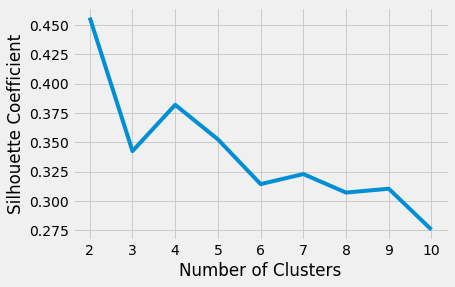

In [26]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
# plt.grid()
plt.show()

In [47]:
agg_model = AgglomerativeClustering(n_clusters=7)

agg_pred = agg_model.fit_predict(X)
agg_clusters = np.unique(agg_pred)

for cluster in agg_clusters:
  row_ix = np.where(agg_pred==cluster)
  print(row_ix)
  print(cluster, X.iloc[row_ix])
#   plt.scatter(row_ix,X.iloc[row_ix])
# plt.grid()
# plt.show()

(array([ 0,  2, 11, 15, 21]),)
0             1    2    3    4    5    6    7    8    9    10   11   12   13  \
0                                                                            
1954-1955  0.8  0.8  0.8  0.8  0.5  0.0 -0.4 -0.5 -0.5 -0.6 -0.8 -0.9 -0.8   
1964-1965  1.3  1.4  1.3  1.1  0.6  0.1 -0.3 -0.6 -0.6 -0.6 -0.7 -0.8 -0.8   
1995-1996  1.0  1.1  1.0  0.7  0.5  0.3  0.1  0.0 -0.2 -0.5 -0.8 -1.0 -1.0   
2005-2006  0.6  0.6  0.4  0.4  0.3  0.1 -0.1 -0.1 -0.1 -0.3 -0.6 -0.8 -0.8   
2017-2018 -0.2  0.1  0.2  0.3  0.3  0.1 -0.1 -0.4 -0.7 -0.8 -1.0 -0.9 -0.9   

            14   15   16   17   18  
0                                   
1954-1955 -0.7 -0.7 -0.7 -0.6 -0.7  
1964-1965 -0.8 -0.8 -0.6 -0.3 -0.1  
1995-1996 -1.0 -0.9 -0.8 -0.6 -0.4  
2005-2006 -0.7 -0.5 -0.3  0.0  0.0  
2017-2018 -0.7 -0.5 -0.2  0.0  0.1  
(array([ 4,  6, 14, 17, 19]),)
1             1    2    3    4    5    6    7    8    9    10   11   12   13  \
0                                                 

In [40]:
year=[0.0833, 0.1667, 0.25, 0.3333, 0.4167, 0.5, 0.5833, 0.6667, 0.75, 0.8333, 0.9167, 1, 1.0833, 1.1667, 1.25, 1.3333, 1.4167, 1.5]

len(year)

18

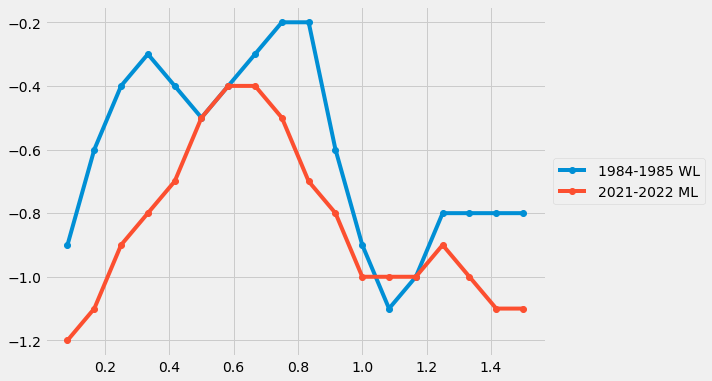

In [59]:
plt.figure(figsize=(8,6))
plt.plot(year,df['1984-1985'], 'o-', label='1984-1985 WL')
plt.plot(year,df['2021-2022'], 'o-', label='2021-2022 ML')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show();

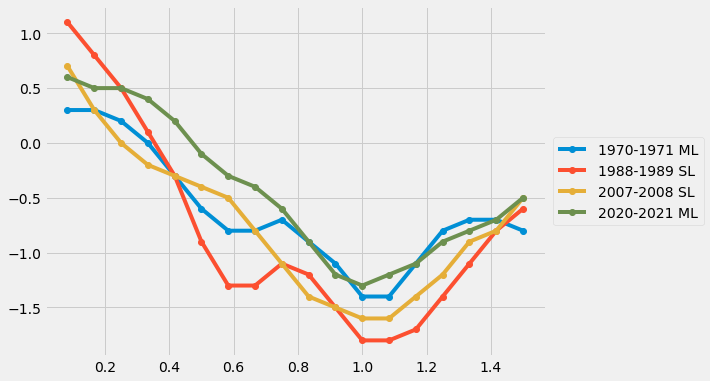

In [56]:
plt.figure(figsize=(8,6))
plt.plot(year,df['1970-1971'], 'o-', label='1970-1971 ML')
plt.plot(year,df['1988-1989'], 'o-', label='1988-1989 SL')
plt.plot(year,df['2007-2008'], 'o-', label='2007-2008 SL')
plt.plot(year,df['2020-2021'], 'o-', label='2020-2021 ML')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show();

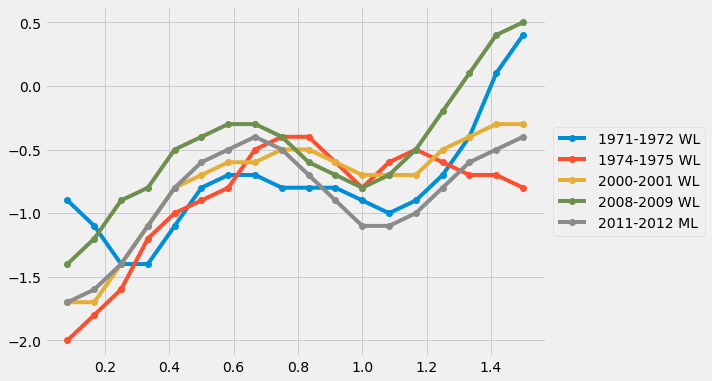

In [54]:
plt.figure(figsize=(8,6))
plt.plot(year,df['1971-1972'], 'o-', label='1971-1972 WL')
plt.plot(year,df['1974-1975'], 'o-', label='1974-1975 WL')
plt.plot(year,df['2000-2001'], 'o-', label='2000-2001 WL')
plt.plot(year,df['2008-2009'], 'o-', label='2008-2009 WL')
plt.plot(year,df['2011-2012'], 'o-', label='2011-2012 ML')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show();

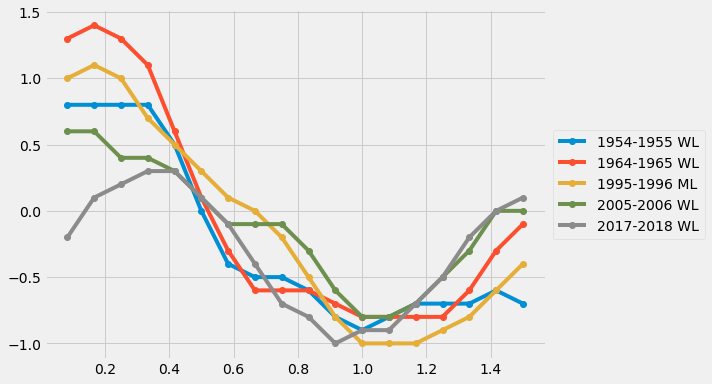

In [55]:
plt.figure(figsize=(8,6))
plt.plot(year,df['1954-1955'], 'o-', label='1954-1955 WL')
plt.plot(year,df['1964-1965'], 'o-', label='1964-1965 WL')
plt.plot(year,df['1995-1996'], 'o-', label='1995-1996 ML')
plt.plot(year,df['2005-2006'], 'o-', label='2005-2006 WL')
plt.plot(year,df['2017-2018'], 'o-', label='2017-2018 WL')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show();

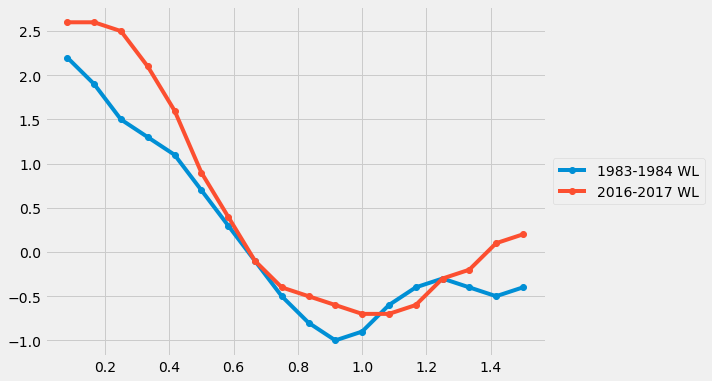

In [44]:
plt.figure(figsize=(8,6))
plt.plot(year,df['1983-1984'], 'o-', label='1983-1984 WL')
plt.plot(year,df['2016-2017'], 'o-', label='2016-2017 WL')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show();

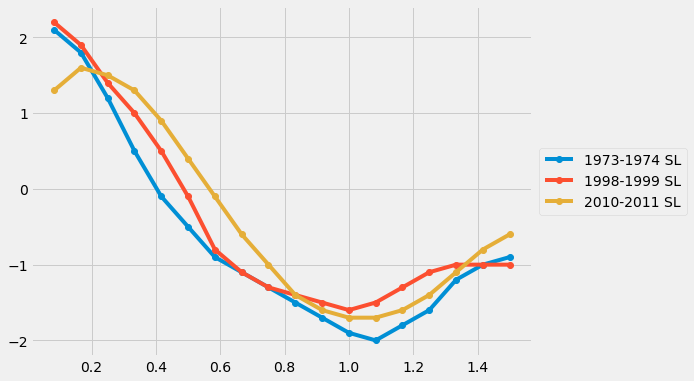

In [43]:
plt.figure(figsize=(8,6))
plt.plot(year,df['1973-1974'], 'o-', label='1973-1974 SL')
plt.plot(year,df['1998-1999'], 'o-', label='1998-1999 SL')
plt.plot(year,df['2010-2011'], 'o-', label='2010-2011 SL')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show();

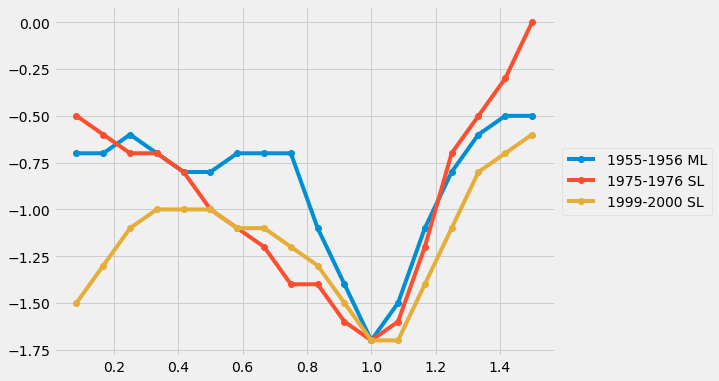

In [57]:
plt.figure(figsize=(8,6))
plt.plot(year,df['1955-1956'], 'o-', label='1955-1956 ML')
plt.plot(year,df['1975-1976'], 'o-', label='1975-1976 SL')
plt.plot(year,df['1999-2000'], 'o-', label='1999-2000 SL')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show();

## Remaining shapes

In [60]:
year=[0.0833, 0.1667, 0.25, 0.3333, 0.4167, 0.5, 0.5833, 0.6667, 0.75, 0.8333, 0.9167, 1, 1.0833, 1.1667, 1.25, 1.3333, 1.4167, 1.5]

len(year)

18

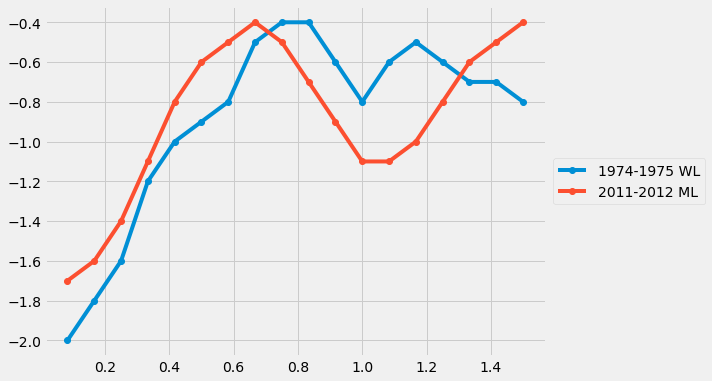

In [62]:
plt.style.use("fivethirtyeight")

plt.figure(figsize=(8,6))
plt.plot(year,df['1974-1975'], 'o-', label='1974-1975 WL')
plt.plot(year,df['2011-2012'], 'o-', label='2011-2012 ML')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show();

## Plots

In [70]:
year=[0.0833, 0.1667, 0.25, 0.3333, 0.4167, 0.5, 0.5833, 0.6667, 0.75, 0.8333, 0.9167, 1, 1.0833, 1.1667, 1.25, 1.3333, 1.4167, 1.5]

len(year)

18

### Group 1

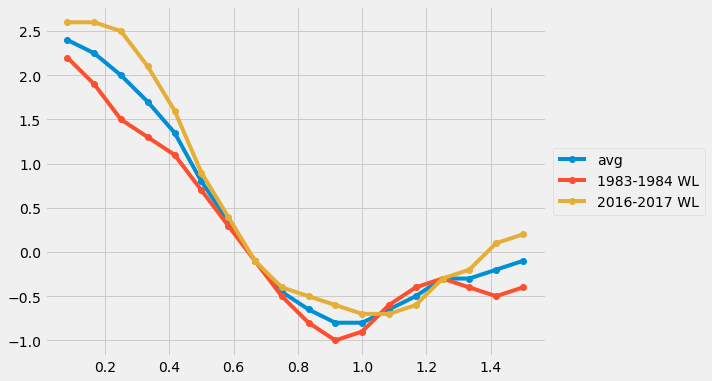

In [71]:
plt.figure(figsize=(8,6))
avg = np.round( (df['1983-1984']+df['2016-2017'])/2, 2 )

plt.plot(year,avg, 'o-', label='avg')
plt.plot(year,df['1983-1984'], 'o-', label='1983-1984 WL')
plt.plot(year,df['2016-2017'], 'o-', label='2016-2017 WL')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show();

### Group 2

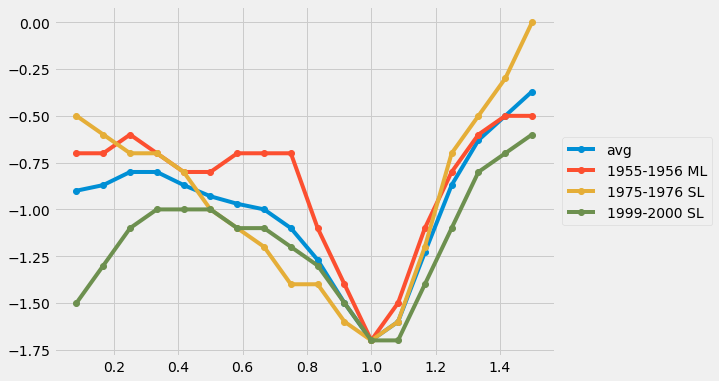

In [72]:
plt.figure(figsize=(8,6))
avg = np.round( (df['1955-1956']+df['1975-1976']+df['1999-2000'])/3, 2 )

plt.plot(year,avg, 'o-', label='avg')
plt.plot(year,df['1955-1956'], 'o-', label='1955-1956 ML')
plt.plot(year,df['1975-1976'], 'o-', label='1975-1976 SL')
plt.plot(year,df['1999-2000'], 'o-', label='1999-2000 SL')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show();

### Group 3

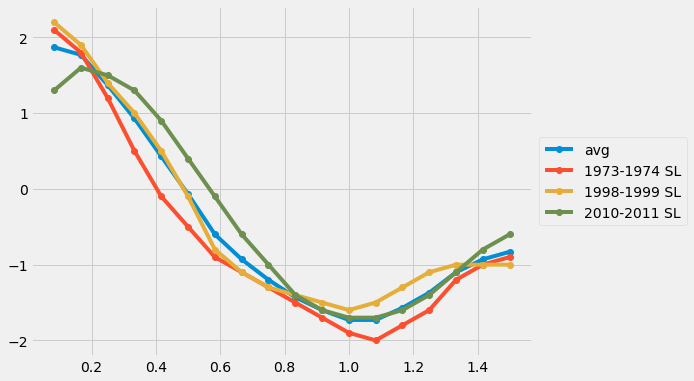

In [73]:
plt.figure(figsize=(8,6))
avg = np.round( (df['1973-1974']+df['1998-1999']+df['2010-2011'])/3, 2 )

plt.plot(year,avg, 'o-', label='avg')
plt.plot(year,df['1973-1974'], 'o-', label='1973-1974 SL')
plt.plot(year,df['1998-1999'], 'o-', label='1998-1999 SL')
plt.plot(year,df['2010-2011'], 'o-', label='2010-2011 SL')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show();

### Group 4

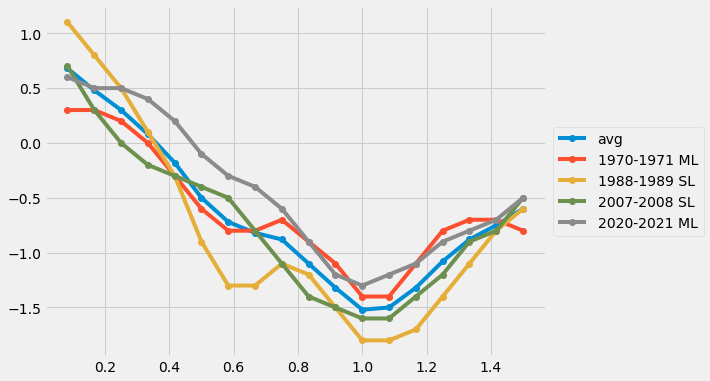

In [74]:
plt.figure(figsize=(8,6))
avg = np.round( (df['1970-1971']+df['1988-1989']+df['2007-2008']+df['2020-2021'])/4, 2 )

plt.plot(year,avg, 'o-', label='avg')
plt.plot(year,df['1970-1971'], 'o-', label='1970-1971 ML')
plt.plot(year,df['1988-1989'], 'o-', label='1988-1989 SL')
plt.plot(year,df['2007-2008'], 'o-', label='2007-2008 SL')
plt.plot(year,df['2020-2021'], 'o-', label='2020-2021 ML')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show();

### Group 5

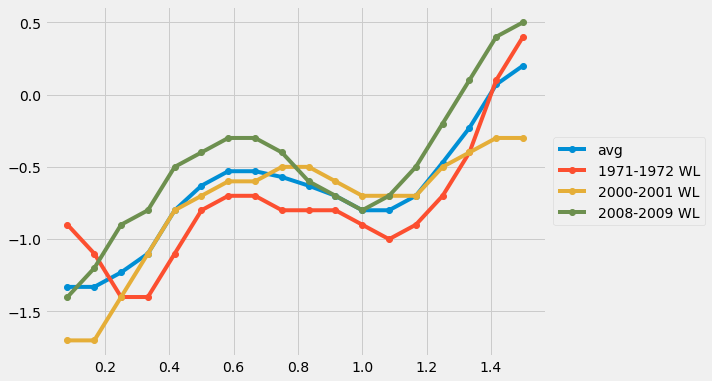

In [75]:
plt.figure(figsize=(8,6))
avg = np.round( (df['1971-1972']+df['2000-2001']+df['2008-2009'])/3, 2 )

plt.plot(year,avg, 'o-', label='avg')
plt.plot(year,df['1971-1972'], 'o-', label='1971-1972 WL')
plt.plot(year,df['2000-2001'], 'o-', label='2000-2001 WL')
plt.plot(year,df['2008-2009'], 'o-', label='2008-2009 WL')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show();

### Group 6

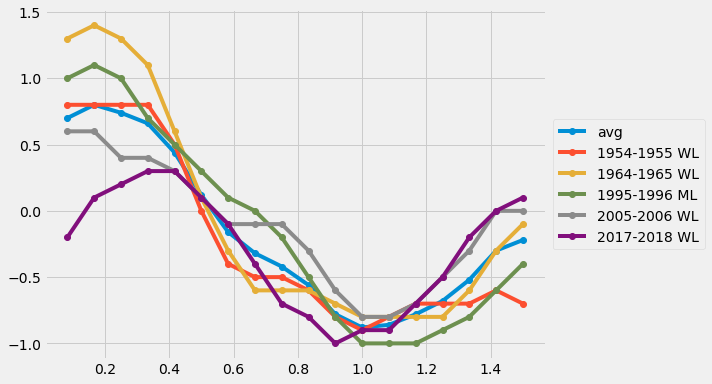

In [77]:
plt.figure(figsize=(8,6))
avg = np.round( (df['2005-2006']+df['2017-2018']+df['1954-1955']+df['1964-1965']+df['1995-1996'])/5, 2 )

plt.plot(year,avg, 'o-', label='avg')
plt.plot(year,df['1954-1955'], 'o-', label='1954-1955 WL')
plt.plot(year,df['1964-1965'], 'o-', label='1964-1965 WL')
plt.plot(year,df['1995-1996'], 'o-', label='1995-1996 ML')
plt.plot(year,df['2005-2006'], 'o-', label='2005-2006 WL')
plt.plot(year,df['2017-2018'], 'o-', label='2017-2018 WL')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show();

### Group 7

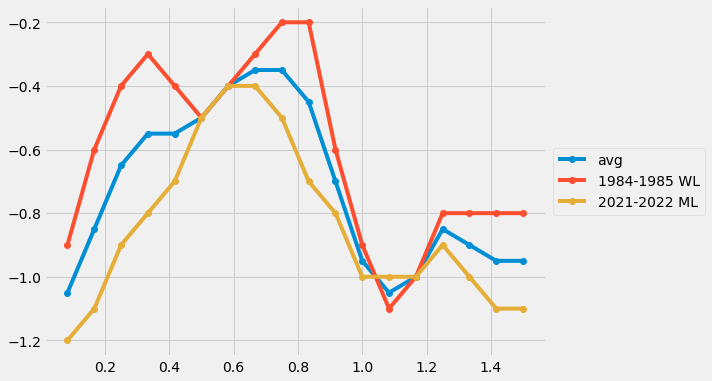

In [78]:
plt.figure(figsize=(8,6))
avg = np.round( (df['1984-1985']+df['2021-2022'])/2, 2 )

plt.plot(year,avg, 'o-', label='avg')
plt.plot(year,df['1984-1985'], 'o-', label='1984-1985 WL')
plt.plot(year,df['2021-2022'], 'o-', label='2021-2022 ML')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show();

### Group 8

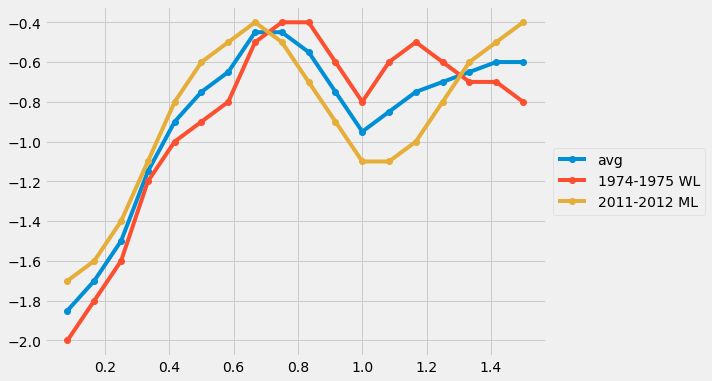

In [76]:
plt.figure(figsize=(8,6))
avg = np.round( (df['1974-1975']+df['2011-2012'])/2, 2 )

plt.plot(year,avg, 'o-', label='avg')
plt.plot(year,df['1974-1975'], 'o-', label='1974-1975 WL')
plt.plot(year,df['2011-2012'], 'o-', label='2011-2012 ML')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show();